# Описание поставленной задачи:

Необходимо решить задачу регрессии оценки риска при выдаче или одобрении кредита клиенту, основываясь на данных о нем (личных, рабочих и тд)

# 1)Чтение данных:

In [57]:
# Модули
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from numpy import log
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Ссылка на датасет
raw_data = pd.read_csv("C:/Users/Lenovo/Downloads/Loan.csv")

# Удаление даты (из за лишней сложности)
raw_data = raw_data.drop(['ApplicationDate', 'LoanApproved'], axis=1)

# Информация о таблице
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  object 
 4   EducationLevel              20000 non-null  object 
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  int64  
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               20000 non-null  object 
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  object 
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCreditLines     200

In [58]:
numeric_feat = []
for feat in raw_data.keys():
  if ((raw_data.dtypes[feat] == 'float64' or raw_data.dtypes[feat] == 'int64') and feat != 'RiskScore'):
      numeric_feat.append(feat)

numeric_feat

['Age',
 'AnnualIncome',
 'CreditScore',
 'Experience',
 'LoanAmount',
 'LoanDuration',
 'NumberOfDependents',
 'MonthlyDebtPayments',
 'CreditCardUtilizationRate',
 'NumberOfOpenCreditLines',
 'NumberOfCreditInquiries',
 'DebtToIncomeRatio',
 'BankruptcyHistory',
 'PreviousLoanDefaults',
 'PaymentHistory',
 'LengthOfCreditHistory',
 'SavingsAccountBalance',
 'CheckingAccountBalance',
 'TotalAssets',
 'TotalLiabilities',
 'MonthlyIncome',
 'UtilityBillsPaymentHistory',
 'JobTenure',
 'NetWorth',
 'BaseInterestRate',
 'InterestRate',
 'MonthlyLoanPayment',
 'TotalDebtToIncomeRatio']

# 2)Визуализация данных и вычисление основных характеристик. Их интерпритация:

Основные характеристики

In [59]:

raw_data.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,2.000000e+04,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,3.625241e+04,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,4.725151e+04,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,3.720000e+02,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,1.119675e+04,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,2.220300e+04,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,4.314650e+04,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,1.417302e+06,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,84.000000


Матрица корреляции 

In [60]:
corr_data = raw_data.corr(numeric_only=True)
corr_data

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
Age,1.000000,0.144774,0.323243,0.982980,-0.007492,-0.006992,-0.000287,0.015685,-0.001394,-0.001069,...,-0.001197,0.144634,-0.005601,-0.000773,0.014061,-0.238995,-0.202702,-0.021380,-0.111800,-0.164304
AnnualIncome,0.144774,1.000000,0.104045,0.145999,-0.004116,0.002972,-0.001244,-0.001082,-0.007935,-0.008175,...,-0.002353,0.989911,-0.012351,-0.000610,-0.004358,-0.074549,-0.063832,-0.004304,-0.532033,-0.483289
CreditScore,0.323243,0.104045,1.000000,0.327664,-0.010834,-0.000762,-0.014453,0.011153,-0.009650,-0.008780,...,-0.006722,0.104796,-0.006838,0.008069,0.001951,-0.722619,-0.598844,-0.063932,-0.115363,-0.240198
Experience,0.982980,0.145999,0.327664,1.000000,-0.007921,-0.007924,0.000136,0.018629,-0.001751,-0.002143,...,-0.000449,0.145950,-0.006603,-0.000762,0.015049,-0.242871,-0.206252,-0.021691,-0.112825,-0.166496
LoanAmount,-0.007492,-0.004116,-0.010834,-0.007921,1.000000,-0.000436,-0.007005,0.021103,0.000806,0.000769,...,0.000502,-0.005407,-0.012107,0.005364,-0.003679,0.385663,0.322824,0.780828,0.457175,0.137981
LoanDuration,-0.006992,0.002972,-0.000762,-0.007924,-0.000436,1.000000,-0.001301,0.000068,-0.006160,0.001489,...,0.003668,0.003067,-0.010105,0.003635,-0.008779,0.579215,0.487994,-0.385495,-0.213984,0.054550
NumberOfDependents,-0.000287,-0.001244,-0.014453,0.000136,-0.007005,-0.001301,1.000000,-0.002396,0.011544,0.006033,...,0.009942,-0.000414,0.008735,0.010910,-0.008423,0.006977,0.006749,-0.001390,-0.000358,0.001686
MonthlyDebtPayments,0.015685,-0.001082,0.011153,0.018629,0.021103,0.000068,-0.002396,1.000000,0.005420,0.006280,...,-0.004211,-0.000356,0.001638,0.005863,0.004430,0.000010,0.003895,0.018021,0.219453,0.036938
CreditCardUtilizationRate,-0.001394,-0.007935,-0.009650,-0.001751,0.000806,-0.006160,0.011544,0.005420,1.000000,0.001491,...,-0.007778,-0.009381,0.013040,-0.006979,-0.003506,0.003668,0.001030,0.004366,0.010490,0.108758
NumberOfOpenCreditLines,-0.001069,-0.008175,-0.008780,-0.002143,0.000769,0.001489,0.006033,0.006280,0.001491,1.000000,...,-0.008406,-0.008050,-0.010497,0.007298,-0.002013,0.007457,0.008090,-0.005058,0.003471,0.007762


Матрица корреляции в виде карты тепла

<Axes: >

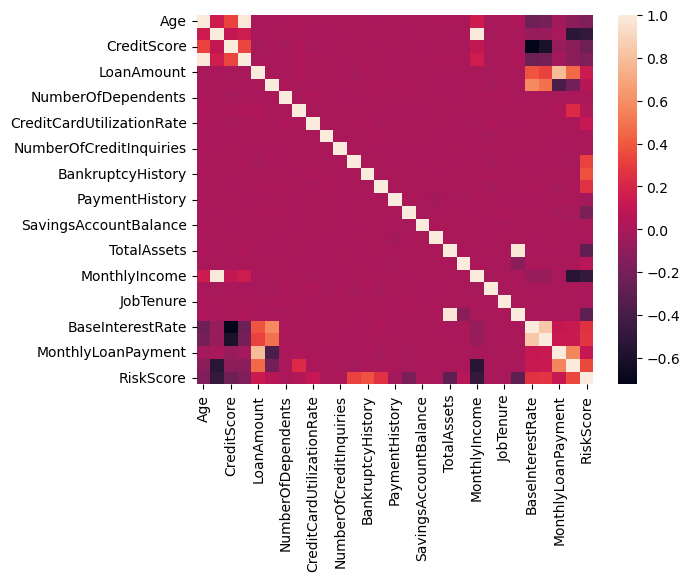

In [61]:

sns.heatmap(corr_data)

Гистограммы численных столбцов

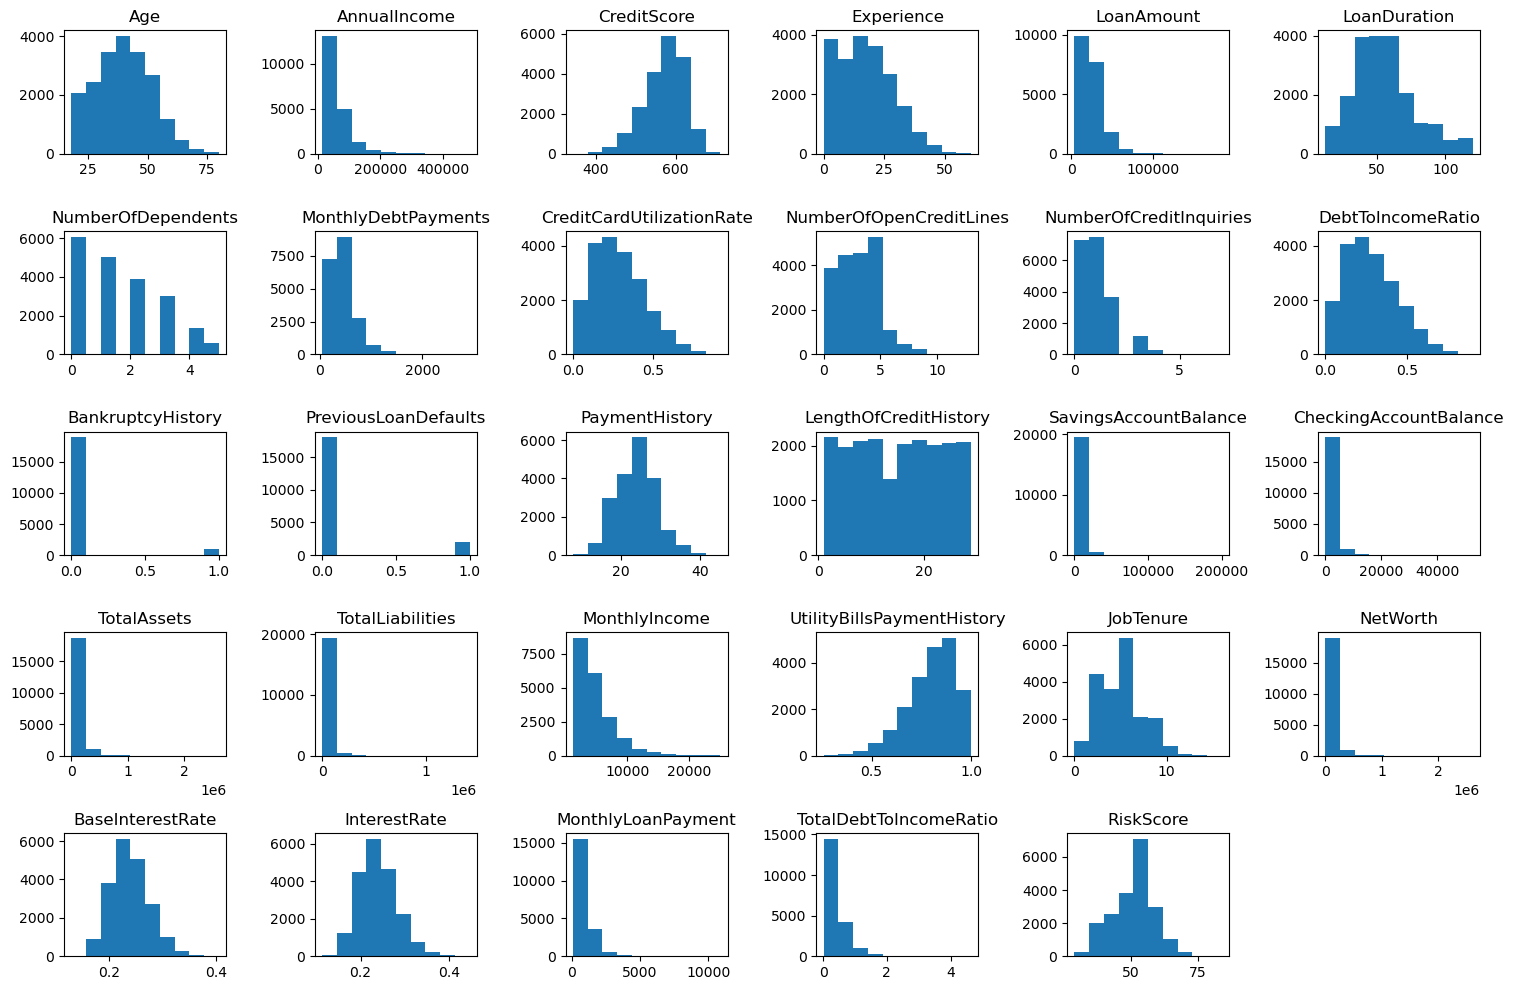

In [62]:
raw_data.hist(grid=False, layout=(5, 6), figsize=(15, 10))
plt.tight_layout()
plt.show()

In [97]:
for_use_data = raw_data

<Axes: >

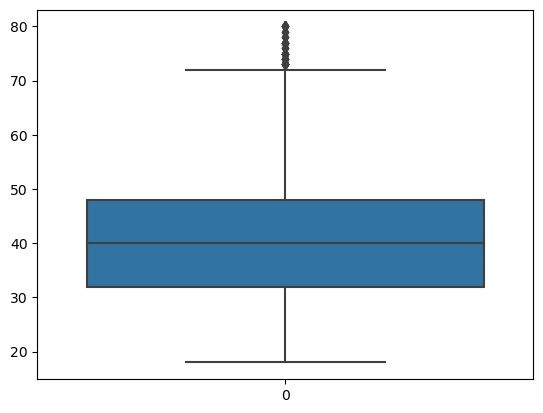

In [98]:
sns.boxplot(raw_data['Age'])

<Axes: >

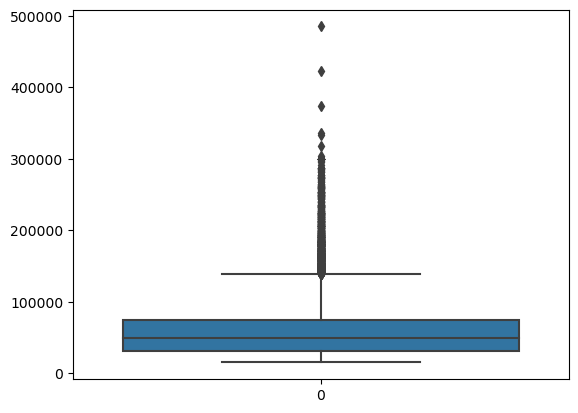

In [99]:
sns.boxplot(raw_data['AnnualIncome'])

<Axes: >

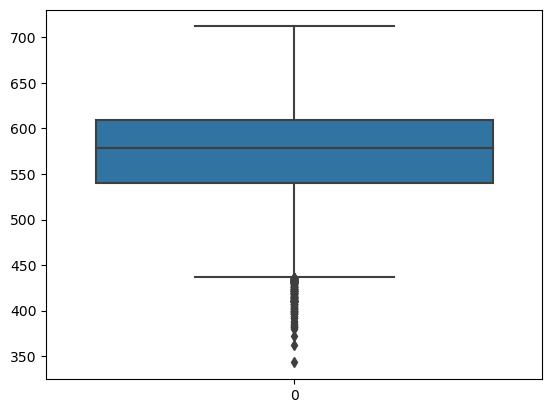

In [100]:
sns.boxplot(raw_data['CreditScore'])

<Axes: >

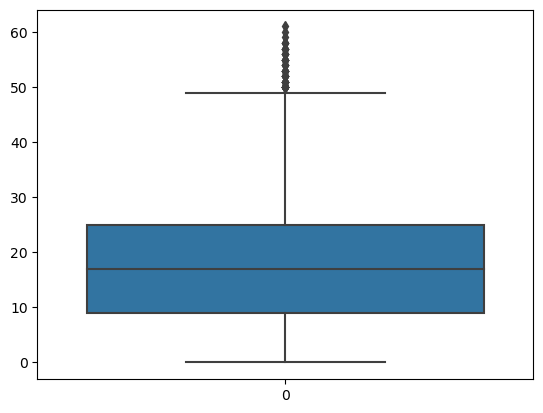

In [101]:
sns.boxplot(raw_data['Experience'])

<Axes: >

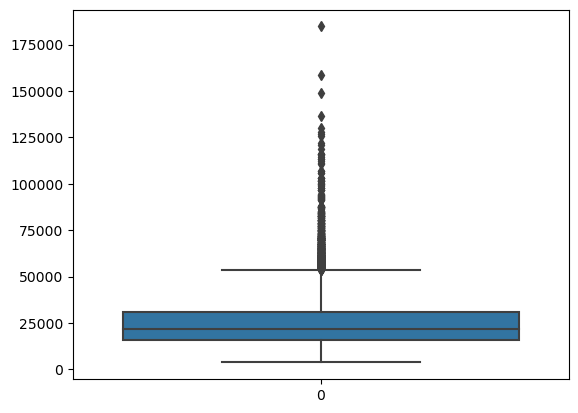

In [102]:
sns.boxplot(raw_data['LoanAmount'])

<Axes: >

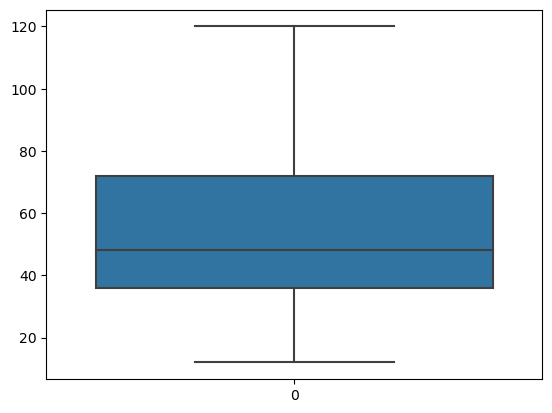

In [103]:
sns.boxplot(raw_data['LoanDuration'])

<Axes: >

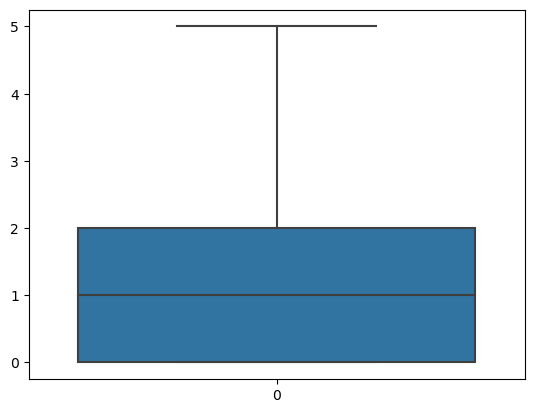

In [104]:
sns.boxplot(raw_data['NumberOfDependents'])

<Axes: >

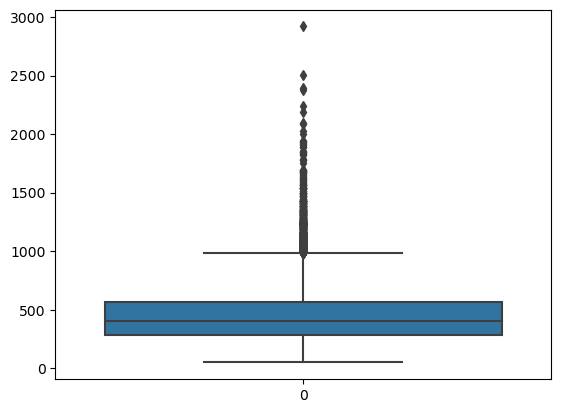

In [105]:
sns.boxplot(raw_data['MonthlyDebtPayments'])

<Axes: >

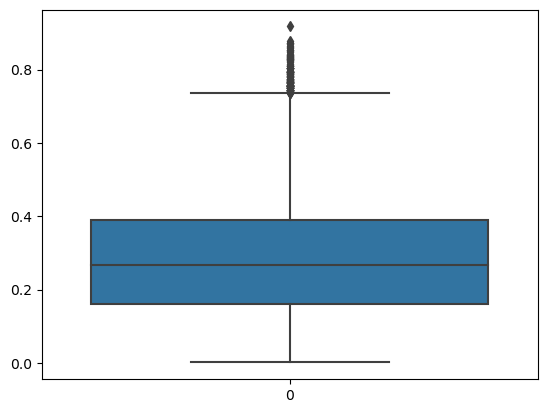

In [106]:
sns.boxplot(raw_data['CreditCardUtilizationRate'])

<Axes: >

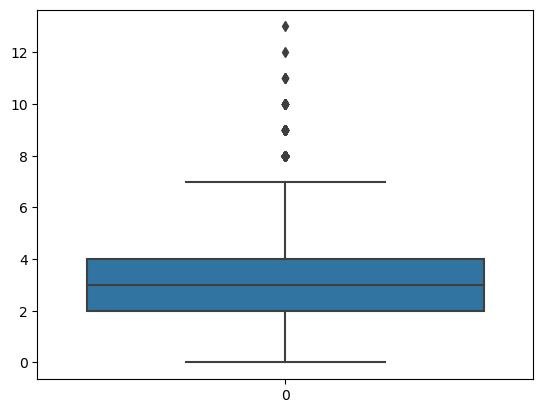

In [107]:
sns.boxplot(raw_data['NumberOfOpenCreditLines'])

<Axes: >

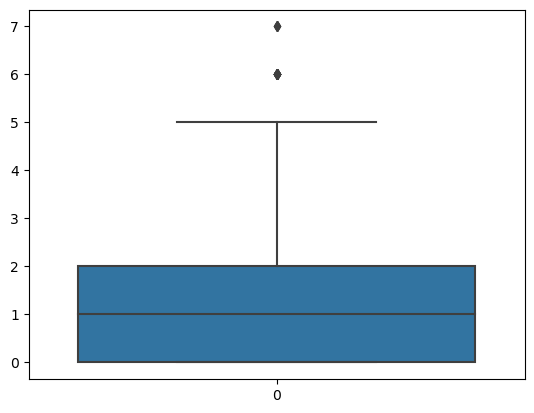

In [108]:
sns.boxplot(raw_data['NumberOfCreditInquiries'])

<Axes: >

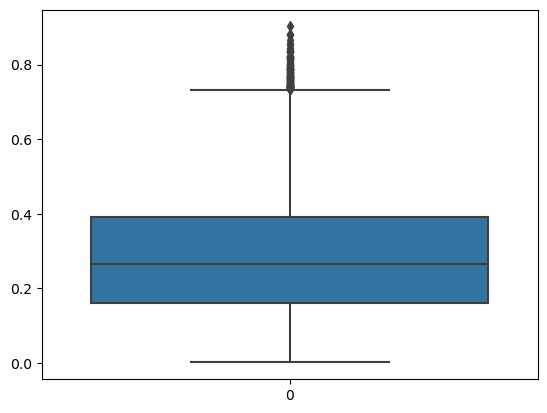

In [109]:
sns.boxplot(raw_data['DebtToIncomeRatio'])

<Axes: >

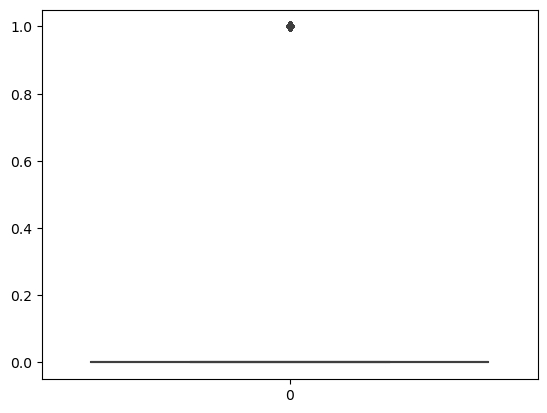

In [110]:
sns.boxplot(raw_data['BankruptcyHistory'])

<Axes: >

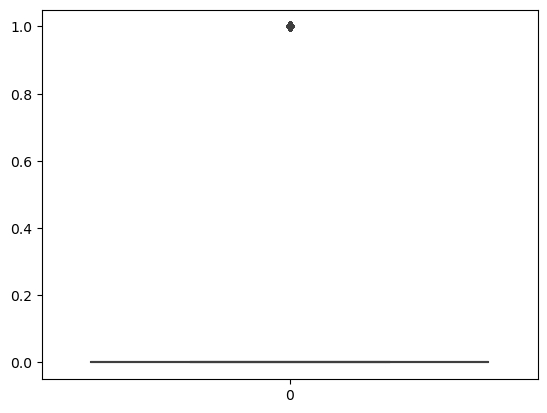

In [111]:
sns.boxplot(raw_data['PreviousLoanDefaults'])

<Axes: >

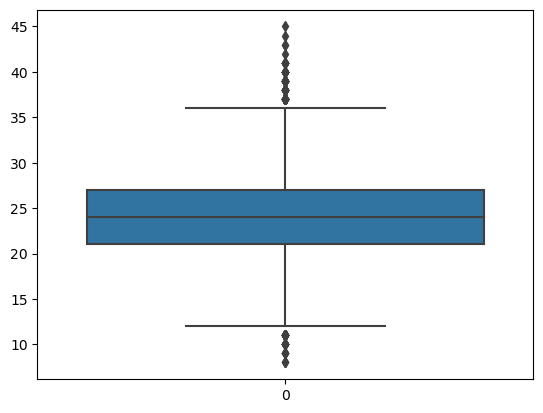

In [112]:
sns.boxplot(raw_data['PaymentHistory'])

<Axes: >

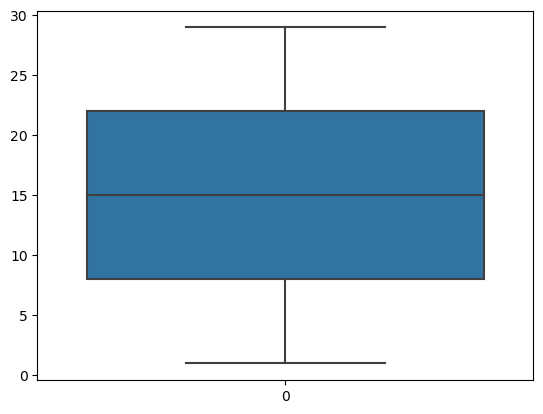

In [113]:

sns.boxplot(raw_data['LengthOfCreditHistory'])

<Axes: >

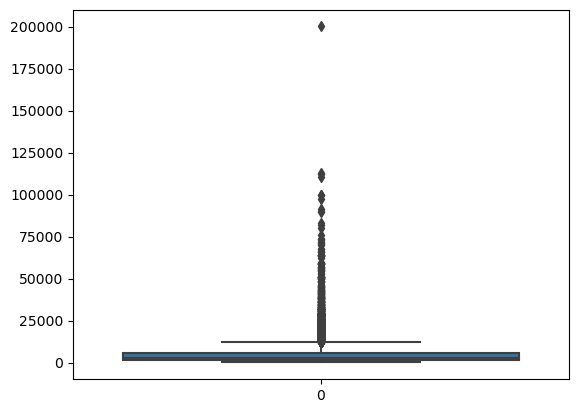

In [114]:
sns.boxplot(raw_data['SavingsAccountBalance'])

<Axes: >

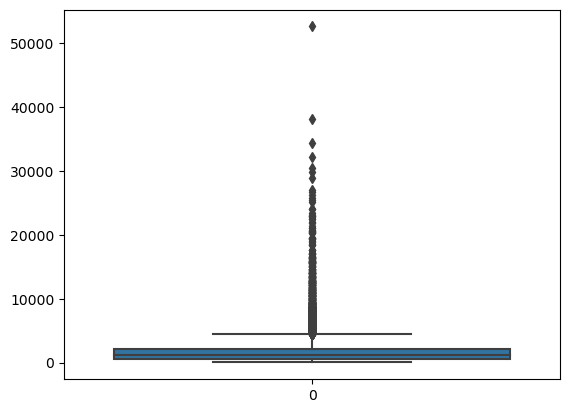

In [115]:
sns.boxplot(raw_data['CheckingAccountBalance'])

<Axes: >

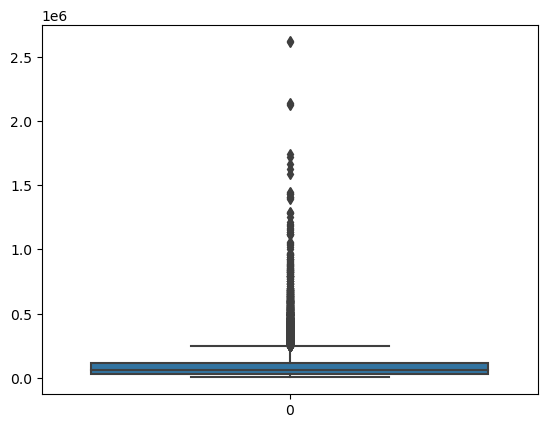

In [116]:
sns.boxplot(raw_data['TotalAssets'])

<Axes: >

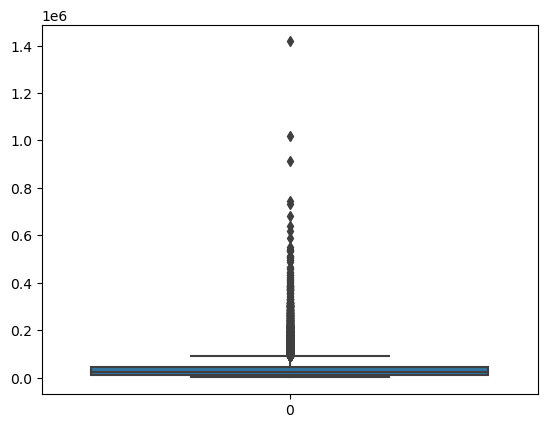

In [117]:
sns.boxplot(raw_data['TotalLiabilities'])

<Axes: >

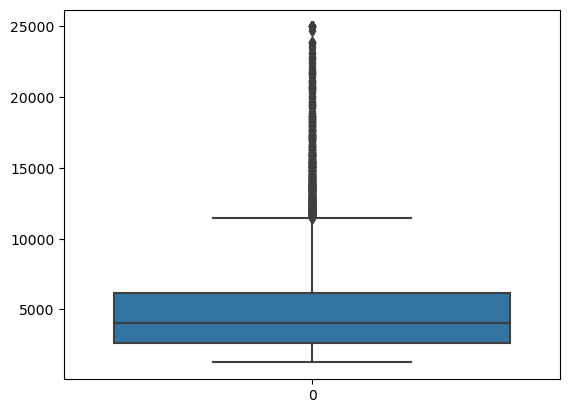

In [118]:
sns.boxplot(raw_data['MonthlyIncome'])

<Axes: >

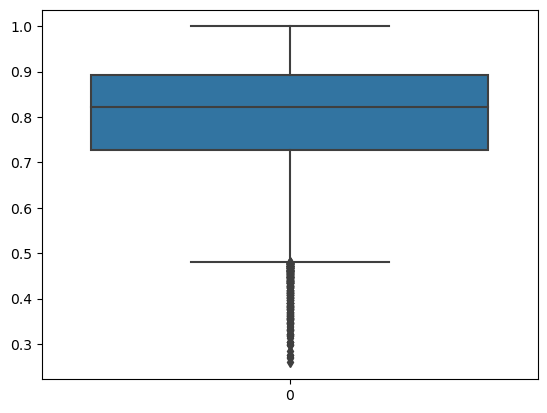

In [119]:
sns.boxplot(raw_data['UtilityBillsPaymentHistory'])

<Axes: >

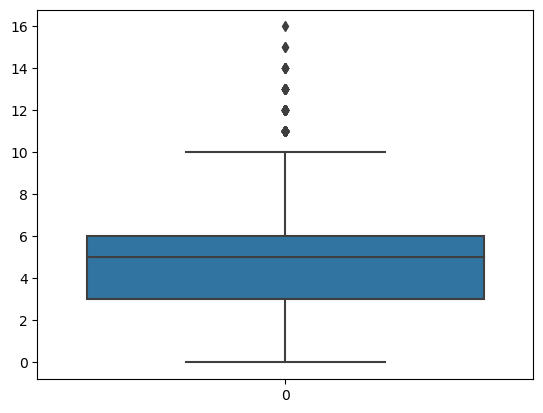

In [120]:
sns.boxplot(raw_data['JobTenure'])

<Axes: >

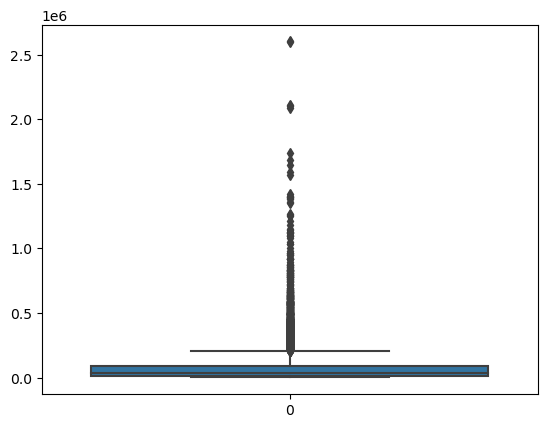

In [121]:
sns.boxplot(raw_data['NetWorth'])

<Axes: >

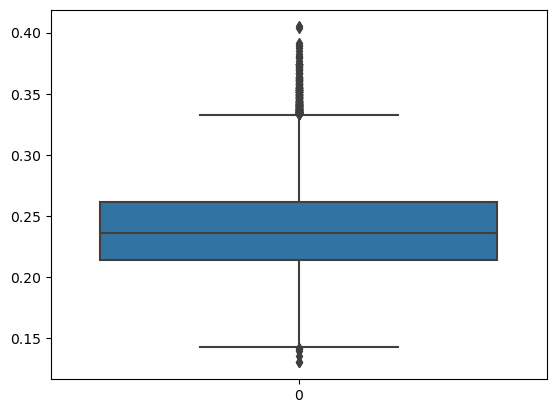

In [122]:
sns.boxplot(raw_data['BaseInterestRate'])

<Axes: >

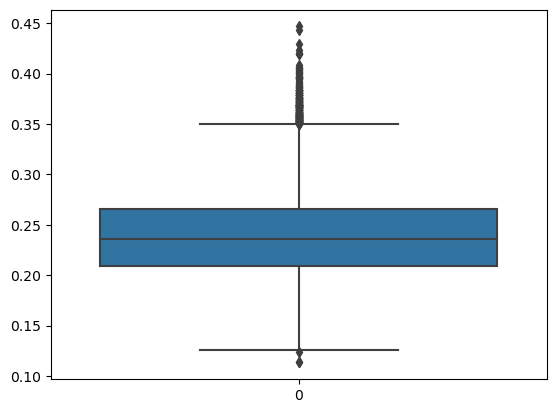

In [123]:
sns.boxplot(raw_data['InterestRate'])

<Axes: >

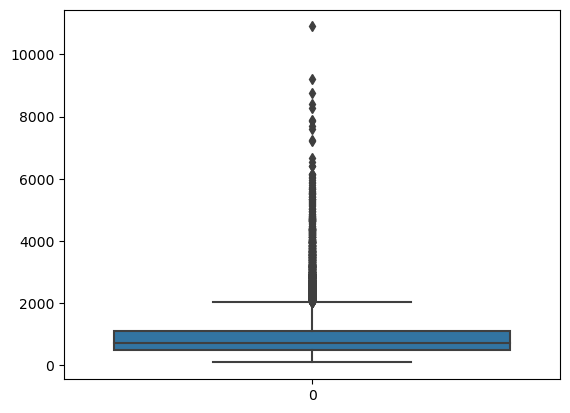

In [124]:
sns.boxplot(raw_data['MonthlyLoanPayment'])

<Axes: >

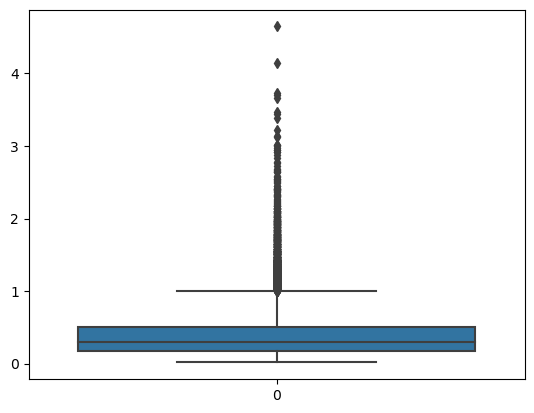

In [125]:

sns.boxplot(raw_data['TotalDebtToIncomeRatio'])

Основные наблюдения:
Минимальный возраст человека берущего кредит - 18;
Средний возраст человека берущего кредит - 40;
Максимальный возраст человека берущего кредит - 80;
Минимальный годовой доход человека берущего кредит - 15000;
Средний годовой доход человека берущего кредит - 48566;
Максимальный годовой доход человека берущего кредит - 485341;
Минимальный ежемесячный платеж человека берущего кредит - 50;
Средний ежемесячный платеж человека берущего кредит - 402;
Максимальный ежемесячный платеж человека берущего кредит - 2919;
Минимальная сумма кредита человека - 3674;
Средняя сумма кредита человека - 21914;
Максимальная сумма кредита человека - 184732.

# 3)Обработка пропущенных значений:

В этом датасете нет пропущенных значений в исходном представлении. 

# 4)Обработка категориальных признаков:

In [126]:
for_use_data = pd.get_dummies(for_use_data, columns=['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose'], drop_first=True)

# 5)Проведение нормализации:

In [127]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for_use_data[numeric_feat] = scaler.fit_transform(for_use_data[numeric_feat])

for_use_data = for_use_data.astype(float) # Для того, чтобы изавиться от boolean переменных

for_use_data


,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,0.451489,-0.476172,0.890021,0.395637,-0.873672,-0.245578,0.348195,-1.128029,0.425792,-1.165445,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.150795,-0.482095,1.105724,-0.222926,0.086551,-0.245578,-0.373154,0.173418,-1.242602,1.138546,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.623571,-0.456940,-0.031618,0.749102,-0.540390,-0.732113,0.348195,1.861556,-0.932273,-0.589447,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.570017,0.245912,-0.521852,1.456031,0.969319,1.700559,-0.373154,1.250334,-0.117617,-0.589447,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.236835,1.093004,0.439006,-0.046193,-1.169194,-0.732113,-0.373154,-0.749653,0.213746,-1.741443,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.365449,-0.718255,0.301741,0.130539,-0.026951,-0.732113,1.069545,0.909380,-1.158361,1.138546,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19996,1.397936,-0.245738,-0.090446,1.367665,0.069645,-0.732113,2.512244,-0.167536,1.160510,-0.589447,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
19997,0.365449,-0.252875,1.439083,0.218905,0.904897,0.727490,1.069545,0.239946,-0.436731,-0.013450,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19998,1.742098,-0.449481,-0.227712,1.632763,-0.753914,0.727490,1.069545,2.210826,0.490501,0.562548,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


# 6)Разбиение данных на обучающую и тестовую выборки:

In [129]:
X = for_use_data.drop(['RiskScore'], axis=1)
y = [log(item) for item in for_use_data['RiskScore']] # Уменьшение разброса

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.25)

# 7)Запуск классификатора (ререссии) ближайших соседей или другого метода:

In [130]:
model_linreg = LinearRegression().fit(X_train, y_train)
y_pred_train_linreg = model_linreg.predict(X_train)
y_pred_test_linreg = model_linreg.predict(X_test)

# 8)Вычисление ошибки на обучающей и тестовой выборках:

In [131]:
print("Среднеквадратичная ошибка для предсказания оценки риска при выдаче кредита (линейная регрессия, обучающая выборка):")
print(mean_squared_error(y_train, y_pred_train_linreg))

Среднеквадратичная ошибка для предсказания оценки риска при выдаче кредита (линейная регрессия, обучающая выборка):
0.005795836370757325


In [132]:
print("Среднеквадратичная ошибка для предсказания оценки риска при выдаче кредита (линейная регрессия, тестовая выборка):")
print(mean_squared_error(y_test, y_pred_test_linreg))

Среднеквадратичная ошибка для предсказания оценки риска при выдаче кредита (линейная регрессия, тестовая выборка):
0.006421213539274152


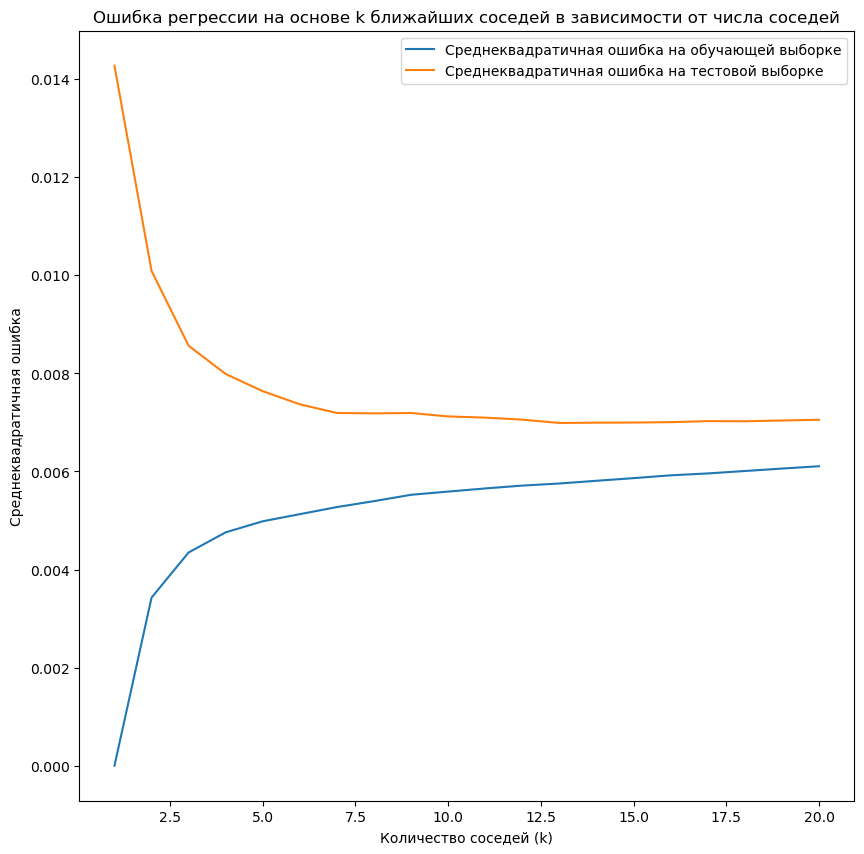

Оптимальное количество соседей: 13
Среднеквадратичная ошибка при оптимальном количестве соседей: 0.006987872390736503


In [136]:
train_err = []
test_err = []
neigh_range = range(1, 21)

for k in neigh_range:
    model_kneigh = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)

    train_err.append(mean_squared_error(y_train, model_kneigh.predict(X_train)))
    test_err.append(mean_squared_error(y_test, model_kneigh.predict(X_test)))

plt.figure(figsize=(10, 10))
plt.plot(neigh_range, train_err, label="Среднеквадратичная ошибка на обучающей выборке")
plt.plot(neigh_range, test_err, label="Среднеквадратичная ошибка на тестовой выборке")
plt.xlabel("Количество соседей (k)")
plt.ylabel("Среднеквадратичная ошибка")
plt.legend()
plt.title("Ошибка регрессии на основе k ближайших соседей в зависимости от числа соседей")
plt.show()

optimal_k = neigh_range[test_err.index(min(test_err))]
print("Оптимальное количество соседей:", optimal_k)
print("Среднеквадратичная ошибка при оптимальном количестве соседей:", min(test_err))

# Выводы:

1.Категориальные признаки были сведены к столбцам с бинарнми значениями, таким образом было удалено использоание строчнх значений.
2.Исходные данные имели большой разброс в столбце оценки риска при выдаче кредита. Используя логарифмирование, удалось достичь меньшего разброса, что положительно сказывается на результате обучения модели.